In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
matplotlib.style.use('ggplot')

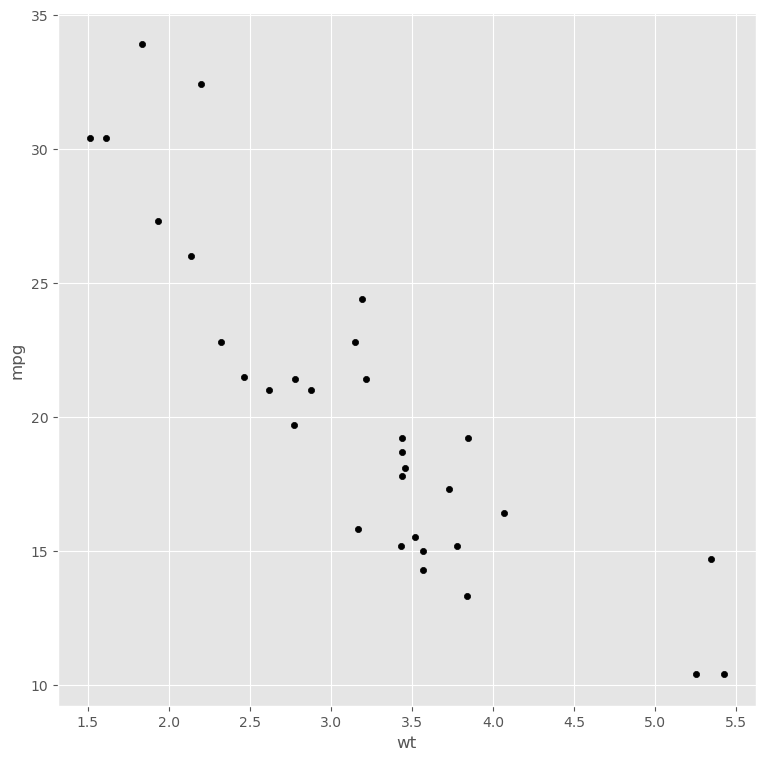

In [2]:
mtcars = pd.read_csv("mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

In [26]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Загружаем модель.
from sklearn import linear_model

# Инмциализируем модель
regression_model = linear_model.LinearRegression()

# Тренируем модель из датасета
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Проверяем интерцепт модели
print(regression_model.intercept_)

# Проверяем коэфициенты модели
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [ ]:
'''
Получим свидетельством, какая часть дисперсии переменной ответа объясняется моделью, с функцией model.score().
'''

In [4]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

In [ ]:
'''
Вес автомобиля объясняет примерно 75,3% разницы в расходе топлива
'''

In [7]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Фактический прогноз - арогноз = остатки
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [ ]:
'''
Или вручную
'''

In [8]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-квадрат
1 - (SSResiduals/SSTotal)

0.7528327936582646

In [ ]:
'''
Те же 75,3%
'''

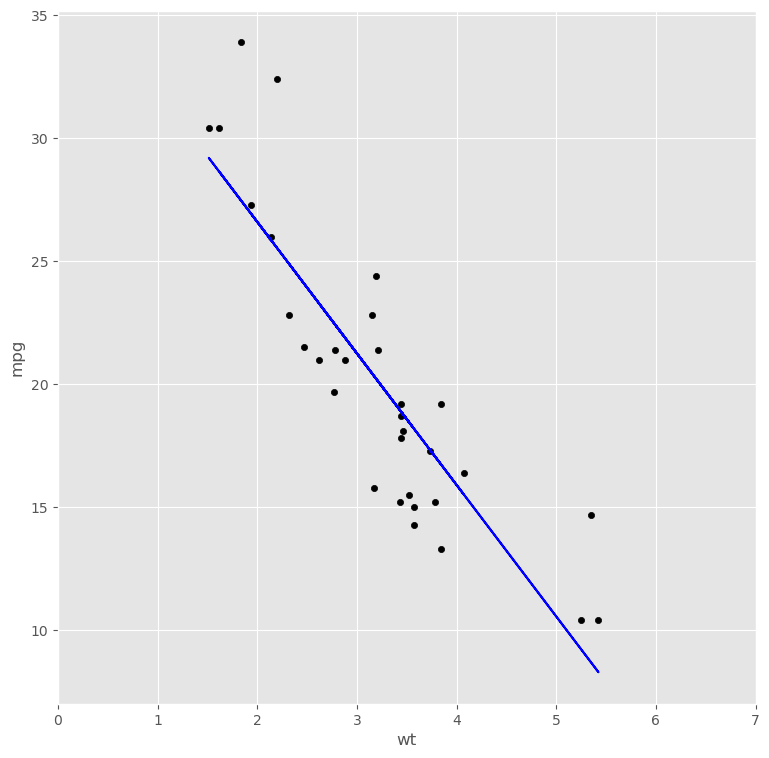

In [9]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Cтроим регрессионную линию
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

In [ ]:
'''
Добавим выброс — супертяжелый экономичный автомобиль — и построим новую регрессионную модель
'''

C:\Users\Luther\AppData\Local\Temp\ipykernel_10228\665236435.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cars = mtcars_subset.append(super_car)


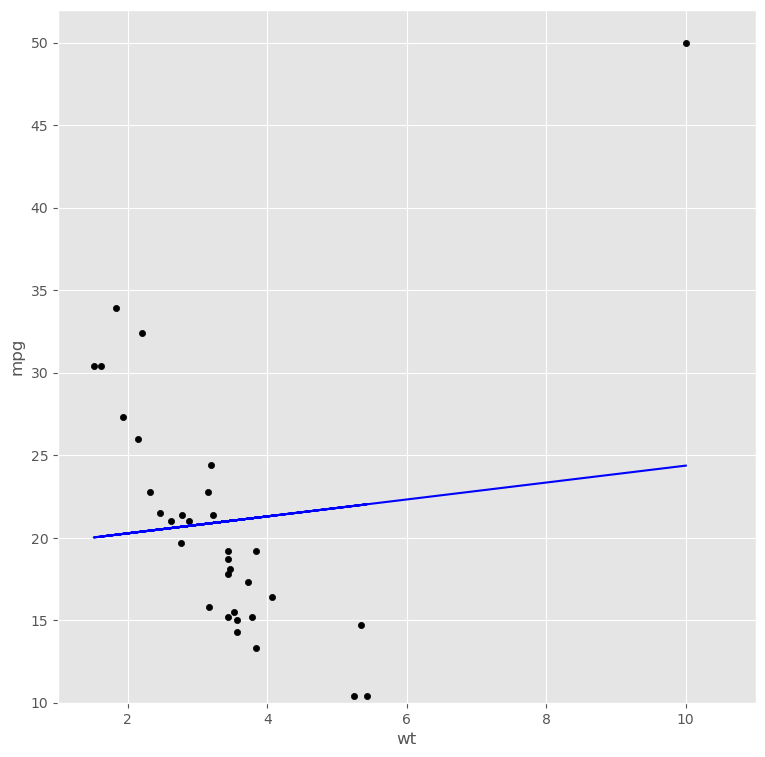

In [10]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Инициализируем модель
regression_model = linear_model.LinearRegression()

# Тренируем модель
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Рисуем модель и регрессионную прямую
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))


plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

In [ ]:
'''
Модель была надуманной, но одинокий выброс произвел неожинанное воздействие.
Проверим нормальность остатков при помощи QQ vtnjlf/
'''

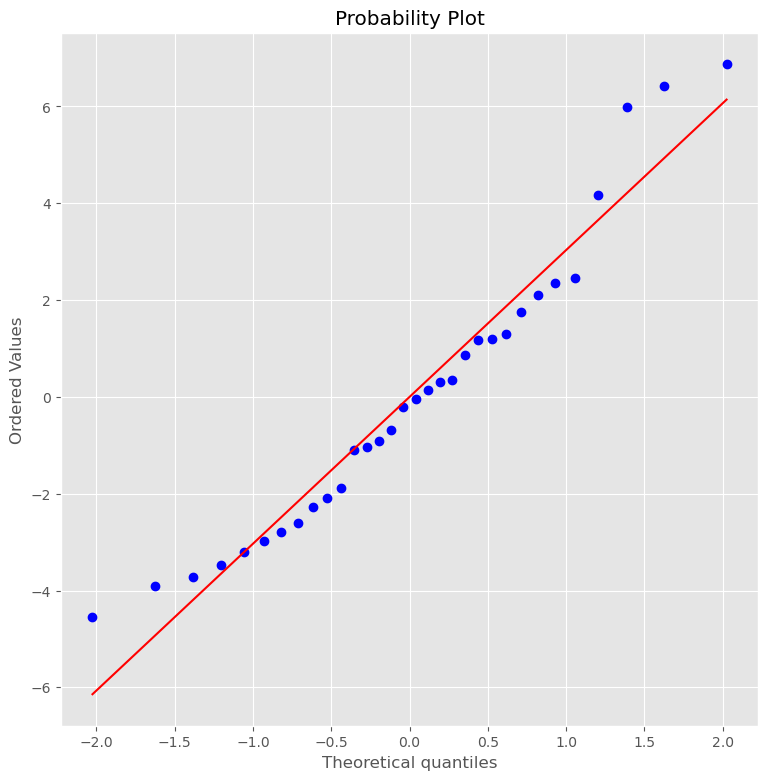

In [11]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

In [12]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, mtcars["mpg"])

2.949162685955028

In [ ]:
'''
Или можем использовать квадратный корень функции среднеквадратической ошибки библиотеки scikit-learn.
'''

In [13]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

In [ ]:
'''
Результат аналогичен.
'''

In [ ]:
'''
Полиномиальная регрессия
'''

In [16]:
poly_model = linear_model.LinearRegression()

# Создадим датафрейм с преремонной предиктора
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2]).T     

# Обучим модель с новыми данными
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Проверим интерцепт
print("Model intercept")
print(poly_model.intercept_)

# Проверим коэфициенты
print("Model Coefficients")
print(poly_model.coef_)

# R-квадрат
print("Model Accuracy:")
print(poly_model.score(X = predictors, 
                 y = mtcars["mpg"]))


Model intercept
49.93081094945177
Model Coefficients
[-13.38033708   1.17108689]
Model Accuracy:
0.8190613581384096


C:\Users\Luther\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


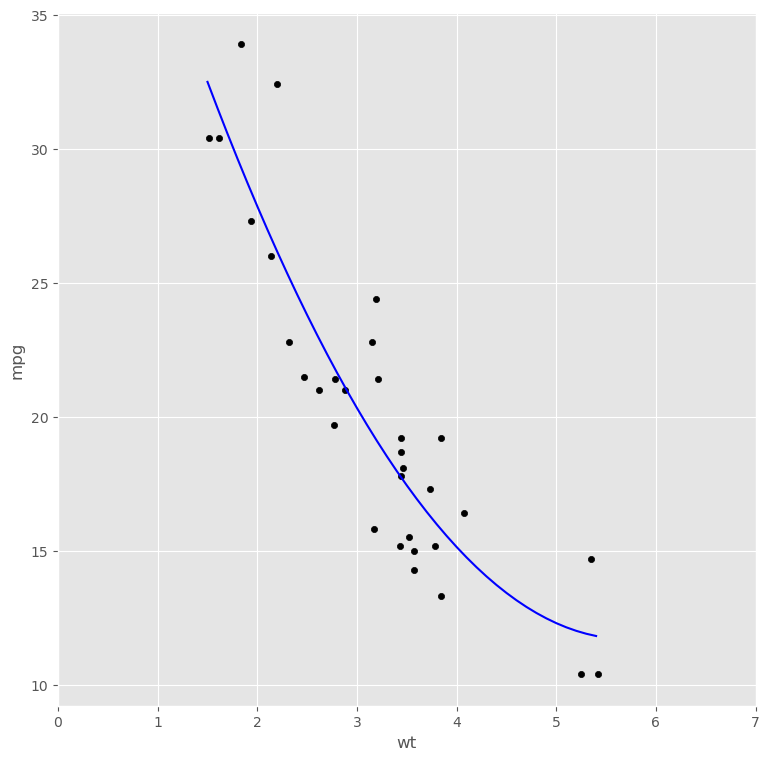

In [17]:
# Создадим регрессионную линию

poly_line_range = np.arange(1.5, 5.5, 0.1)

# Получим предикторы первого и второго порядка
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Построим кривую
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

In [ ]:
'''
Проверим ошибку
'''

In [18]:
preds = poly_model.predict(X=predictors)

rmse(preds , mtcars["mpg"])

2.523300472461078

In [ ]:
'''
Результат стал лучше, всравнении с линейной моделью.
'''

In [ ]:
'''
Попробуем рассмотреть более ысокую степень (10)
'''

In [19]:
poly_model = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

print("Model intercept")
print(poly_model.intercept_)

print("Model Coefficients")
print(poly_model.coef_)

poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.121249961852
Model Coefficients
[ 6.45813587e+04 -1.20086135e+05  1.26931932e+05 -8.46598475e+04
  3.73155207e+04 -1.10334757e+04  2.16590408e+03 -2.70730549e+02
  1.94974165e+01 -6.15515444e-01]


0.8702106603743417

In [ ]:
'''
R-квадрат заметно улучшился. Попробуем построить кривую регресии
'''

C:\Users\Luther\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


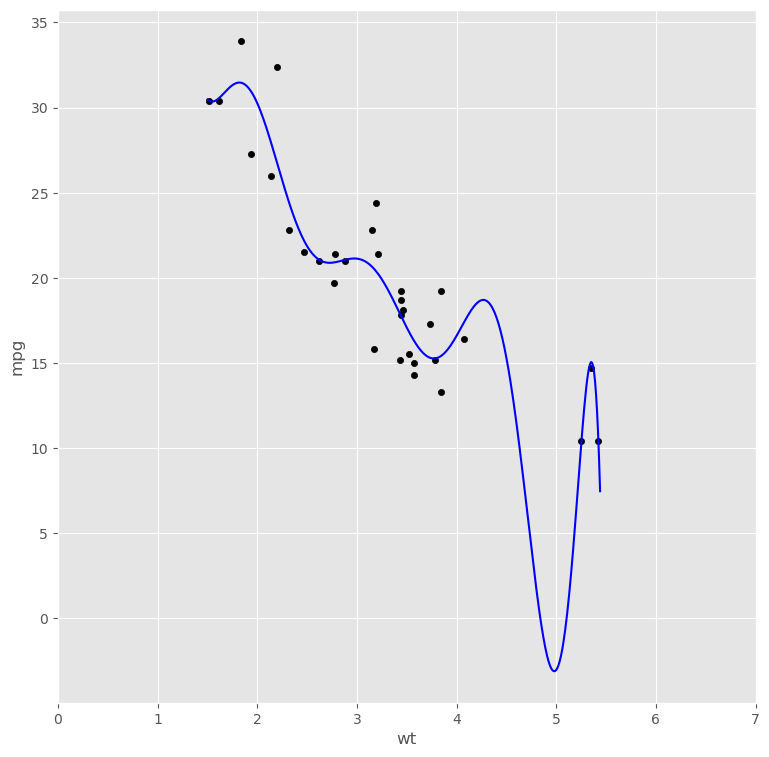

In [20]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

plt.plot(p_range,   
         y_values,         
         color="blue");

In [ ]:
'''
Кривая показывает абсурдные значения, например нудевой расход топлива у авто в две тонны весом
'''

In [ ]:
'''
Множественная линейная регрессия
'''

In [21]:
multi_reg_model = linear_model.LinearRegression()

multi_reg_model.fit(X = mtcars.loc[:,["wt","hp"]], 
                     y = mtcars["mpg"])

print(multi_reg_model.intercept_)

print(multi_reg_model.coef_)

multi_reg_model.score(X = mtcars.loc[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.22727011644721
[-3.87783074 -0.03177295]


0.8267854518827915

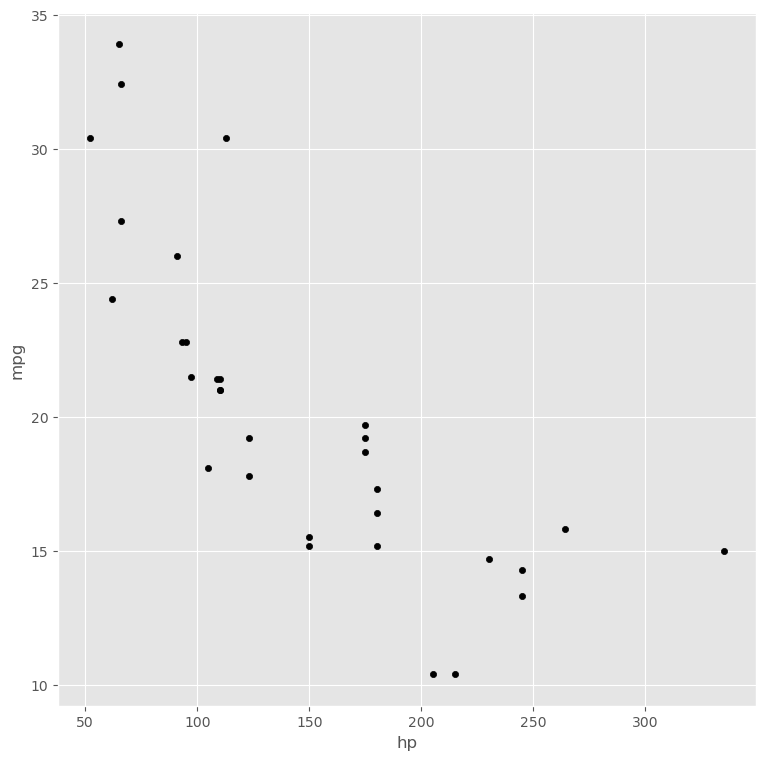

In [25]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black");


In [23]:
multi_reg_model = linear_model.LinearRegression()

# Включим квадратные члены
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])

print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-Squared
0.8907279549670641
RMSE
1.9609108134176987


In [ ]:
'''
R-квадрат получился низким, но стоит помнить, что остается риск мультиколлениарности параметров.
'''